<a href="https://colab.research.google.com/github/SantoshMahara/Nural_networks_DeepLearning/blob/main/HS_LSTM_DY3_Dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hi everyone!, Good Morning**
**Waiting for others to join, we would be beginning by 7:05AM**

<hr>

# **LSTM - Stock Price Predictor**

<hr>

# **Step 1 - Importing the libraries**

**Configuration libraries**

In [ ]:
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")

**Needed Libraries**

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

**Machine Learning Libraries**

In [ ]:
from sklearn.metrics import *
from keras.layers import LSTM, Dense
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

<hr>

# **Step 2 - Grabbing the data from the API or by using yfinance**

**Stock API**

* **Here we are using yfinance: https://pypi.org/project/yfinance/**

In [ ]:
# !pip install yfinance

In [ ]:
import yfinance as yf

**Grabbing data from YFINANCE**

In [ ]:
data = yf.Ticker("AAPL")

In [ ]:
data.info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '408 996 1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and pod

In [ ]:
current_date = datetime.now()


start_date = datetime(current_date.year - 1, current_date.month, current_date.day)

In [ ]:
datetime(2024 - 1, 6, 21)

datetime.datetime(2023, 6, 21, 0, 0)

In [ ]:
data = yf.download("AAPL", start_date, current_date)

[*********************100%%**********************]  1 of 1 completed


**Data Inspection**

In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-13,214.740005,216.750000,211.600006,214.240005,214.240005,97862700
2024-06-14,213.850006,215.169998,211.300003,212.490005,212.490005,70122700
2024-06-17,213.369995,218.949997,212.720001,216.669998,216.669998,93728300
2024-06-18,217.589996,218.630005,213.000000,214.289993,214.289993,79943300
2024-06-20,213.929993,214.240005,208.850006,209.679993,209.679993,86090700


**Visualize**

In [ ]:
fig = px.line(data, x = data.index, y = "Close", title = "The close price for APPLE")
fig.show()

<hr>

**Data Information**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-06-21 to 2024-06-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


**Stock Market open only in weekdays, so in 104 days are weekends**

<hr>

# **Step 3 - Information on Close Prices**

In [ ]:
fig = px.line(data, x = data.index, y = "Close", title = "The close price for APPLE")
fig.show()

**Insights**
  * **Noise in the data - Moving Average Technique**
  * **Have a no Exact Trend either positive or negative**
  * **Uptrend, DownTrend and Sideways**



<hr>

# **Step 4 - Information on volume of assests traded**

  * **It is the number / quantity of assests sold or traded between daily open and close**

In [ ]:
fig = px.line(data, x = data.index, y = "Volume", title = "The volume trades for APPLE")
fig.show()

<hr>

# **Step 5 - Moving Average technique**

  * **This will help us find out the updates that were done according to the specified timeframe**

**Finding the MA for the data**

In [ ]:
moving_average = [10, 15, 20, 30]

for x in moving_average:
  column_name = f"MA for {x} days"
  data[column_name] = data["Close"].rolling(window = x).mean()

In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 15 days,MA for 20 days,MA for 30 days
Date,,,,,,,,,,
2024-06-13,214.740005,216.750000,211.600006,214.240005,214.240005,97862700,199.545000,196.258666,194.893999,191.073000
2024-06-14,213.850006,215.169998,211.300003,212.490005,212.490005,70122700,201.569000,197.965999,196.026499,192.388333
2024-06-17,213.369995,218.949997,212.720001,216.669998,216.669998,93728300,203.833000,199.745333,197.366499,193.498000
2024-06-18,217.589996,218.630005,213.000000,214.289993,214.289993,79943300,205.826999,201.365332,198.528999,194.583999
2024-06-20,213.929993,214.240005,208.850006,209.679993,209.679993,86090700,207.207999,202.657999,199.395499,195.493332


**Visualize the same for getting idea which is useful**

In [ ]:
fig = px.line(data, x = data.index, y = ["Close", "MA for 10 days"	,"MA for 15 days"], title = "The MA for APPLE")
fig.show()

**Based on the graph we can say**
  * **The MA taken for 20 - 30 days is not able to give us the complete information about the trends, it too smooth with respect to the data**
  * **If we look on to 10 or 15 days MA data, it seems more promising as it captures more information into it**

  * **`We can move forward with MA data having average rolled between 10 or 15 days (Recommendation : 10 days seems more promising)`**

# **Step 6 - Daily Returns of the stock on based on average**
  * **This will let us understand the risk associated with investing in each stock. So, to judge that we have to look onto the daily changes happening with the stock, here absolution won't work**

* **We need to calculate the change in the prices on daily basis**

In [ ]:
data["Daily Percent"] = data["Close"].pct_change()

* **Trying to visualize to get a idea of how much change we are having on daily basis**

In [ ]:
fig = px.line(data, x = data.index, y = ["Daily Percent"], title = "The Percent change on daily basis for APPLE")
fig.show()

**Use histogram for getting an idea about what is the average change happening**

In [ ]:
fig = px.histogram(data, x ="Daily Percent", title = "Change in stocks")
fig.show()

<hr>

# **Step 7 - Analysing the risk**

In [ ]:
risk_data = pd.DataFrame(data["Adj Close"].pct_change().dropna())

In [ ]:
risk_data

,Adj Close
Date,
2023-06-22,0.016525
2023-06-23,-0.001711
2023-06-26,-0.007553
2023-06-27,0.015059
2023-06-28,0.006328
...,...
2024-06-13,0.005491
2024-06-14,-0.008168
2024-06-17,0.019671


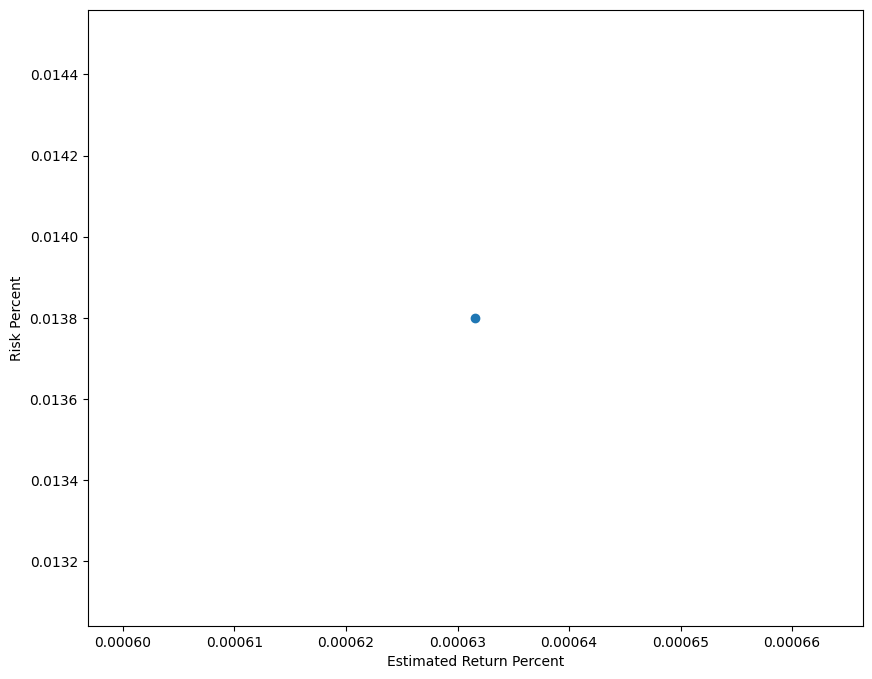

In [ ]:
plt.figure(figsize = (10, 8))
plt.scatter(risk_data.mean(), risk_data.std())
plt.xlabel("Estimated Return Percent")
plt.ylabel("Risk Percent")
plt.show()

<hr>

# **Step 8 - Working with the training and testing data**

In [ ]:
data = yf.download("AAPL", start = "2014-01-01", end = current_date)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
fig = px.line(data, x = data.index, y = "Close", title = "The close price for APPLE")
fig.show()

**Creating a seperate dataframe that only has Close columns so that we can focus on that only**

In [ ]:
df_close = data[["Close"]]

In [ ]:
len(df_close)

2634

**Grabbing the number of rows for training**

In [ ]:
train_len = int(np.ceil(len(df_close)*0.90))

In [ ]:
int(np.ceil(len(df_close)*0.90))

2371

# **Step 9 - Working with the prediction of the data**
  * **Scaling the data**

In [ ]:
scaler = MinMaxScaler()

data_scaled = scaler.fit_transform(df_close)

In [ ]:
pd.DataFrame(data_scaled, columns = ["Scaled Data"])

,Scaled Data
0,0.009583
1,0.007401
2,0.007931
3,0.007232
4,0.007846
...,...
2629,0.987778
2630,0.978976
2631,1.000000
2632,0.988029


<hr>

# **Step 10 - Splitting the training and the testing data**

* **We need to create the training data**

In [ ]:
train_data = data_scaled[0: train_len, :]

* **We need to split the training data into x and y**

In [ ]:
past_days_in_consideration = 60

In [ ]:
x_train, y_train = [], []

In [ ]:
for i in range(60, len(train_data)):
  x_train.append(train_data[i - past_days_in_consideration: i, 0])
  y_train.append(train_data[i, 0])

In [ ]:
# Converting into array and reshaping
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(2311, 60)

In [ ]:
# reshape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
x_train.shape

(2311, 60, 1)

<hr>

# **Step 11 - Working with LSTM**

* **Structure of the train network**
  * **Two LSTM Units**
  * **Two output units**

In [ ]:
model = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(30))
model.add(Dense(1))

**Compile**

In [ ]:
model.compile(optimizer = "adam", loss = "mean_squared_error")

**Fitting the data**

In [ ]:
model.fit(x_train, y_train, batch_size = 1, epochs = 2)

Epoch 1/2
2311/2311 [==============================] - 28s 8ms/step - loss: 0.0011
Epoch 2/2
2311/2311 [==============================] - 18s 8ms/step - loss: 5.3821e-04


**Testing data Creation**

In [ ]:
test_data = data_scaled[train_len - 60: , ]

**Creating the Subset of testing data**

In [ ]:
x_test = []

y_test = df_close.values[train_len: , :]

In [ ]:
for i in range(60, len(test_data)):
  x_test.append(test_data[i - 60: i, 0])

In [ ]:
# Converting into array
x_test = np.array(x_test)

In [ ]:
# reshape
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

* **Predictions**

In [ ]:
predictions = model.predict(x_test)


predictions = scaler.inverse_transform(predictions)

9/9 [==============================] - 0s 9ms/step


**Evaluations**

In [ ]:
def evaluate(y_test = y_test, predictions = predictions):
  mse = mean_squared_error(y_test, predictions)
  print(f"MSE: {mse}")
  rmse = np.sqrt(mse)
  print(f"RMSE: {rmse}")
  r2score = r2_score(y_test, predictions)
  print(f"R2_Score: {r2score}")

In [ ]:
evaluate()

MSE: 15.936706304735196
RMSE: 3.9920804481792693
R2_Score: 0.8322791357981368


**Visualize**

In [ ]:
train = df_close[: train_len]

prediction_data = df_close[train_len: ]
prediction_data['Predicted'] = predictions

In [ ]:
# Helper

a = prediction_data["Close"].values

b = prediction_data["Predicted"].values

In [ ]:
fig = px.line(train, x = train.index, y = "Close", title = "Final Analysis Results")
fig.add_scatter(x = prediction_data.index, y = a, name = "Actual")
fig.add_scatter(x = prediction_data.index, y = b, name = "Predictions")
fig.show()